In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectPercentile,SelectFromModel,SelectKBest,VarianceThreshold

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
df=pd.read_csv('../dataset/santander-train.csv',nrows=20000)

In [7]:
df.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 371 entries, ID to TARGET
dtypes: float64(98), int64(273)
memory usage: 56.6 MB


In [10]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,20061.961650,-1897.271300,33.211100,92.301165,74.055368,124.996779,4.594701,8.223776,0.715500,0.910500,...,3.516513,0.635208,7.948211,5.441945,51.207073,2.386929,101.280122,70.141481,1.169375e+05,0.040650
std,11581.411038,43548.725456,12.911738,2051.311484,345.259590,578.897994,113.296186,183.284585,51.367743,55.921663,...,230.806958,56.841213,579.492118,384.791074,3379.245159,157.196356,5841.191494,3541.831812,1.630858e+05,0.197483
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.486360e+03,0.000000
25%,9987.500000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.782193e+04,0.000000
50%,20075.500000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.068212e+05,0.000000
75%,30168.500000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.193943e+05,0.000000
max,40066.000000,235.000000,102.000000,210000.000000,12888.030000,21024.810000,7904.220000,11073.570000,6600.000000,6600.000000,...,22217.130000,6643.290000,63317.190000,42767.160000,438329.220000,18928.590000,681462.900000,374947.530000,9.792857e+06,1.000000


In [11]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [12]:
df.isnull().sum().sum()

0

# Splitting data into training and testing dataset

In [13]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [15]:
x_train.shape,x_test.shape

((16000, 370), (4000, 370))

# Removing constant features

In [16]:
constant=VarianceThreshold(threshold=0)
constant.fit(x_train)

VarianceThreshold(threshold=0)

In [17]:
constant.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
x_train.columns[constant.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=291)

In [19]:
x_train1=constant.transform(x_train)
x_test1=constant.transform(x_test)

In [20]:
x_train1.shape,x_test1.shape

((16000, 291), (4000, 291))

# Removing Quasi constant features

In [17]:
qc=VarianceThreshold(threshold=0.01)
qc.fit(x_train1)

VarianceThreshold(threshold=0.01)

In [18]:
qc.get_support().sum()

245

In [19]:
x_train2=qc.transform(x_train1)
x_test2=qc.transform(x_test1)

In [20]:
x_train2.shape,x_test2.shape

((16000, 245), (4000, 245))

# Removing duplicate features

In [21]:
t1=x_train2.T
t2=x_test2.T

In [22]:
d1=pd.DataFrame(t1)
d2=pd.DataFrame(t2)

In [23]:
duplicate=[not index for index in d1.duplicated()]

In [24]:
n1=d1[duplicate]
n2=d2[duplicate]

In [25]:
x_train3=n1.T
x_test3=n2.T

In [26]:
x_train3.shape,x_test3.shape

((16000, 227), (4000, 227))

# Removing Multicollinearity

In [27]:
cormat=x_train3.corr()

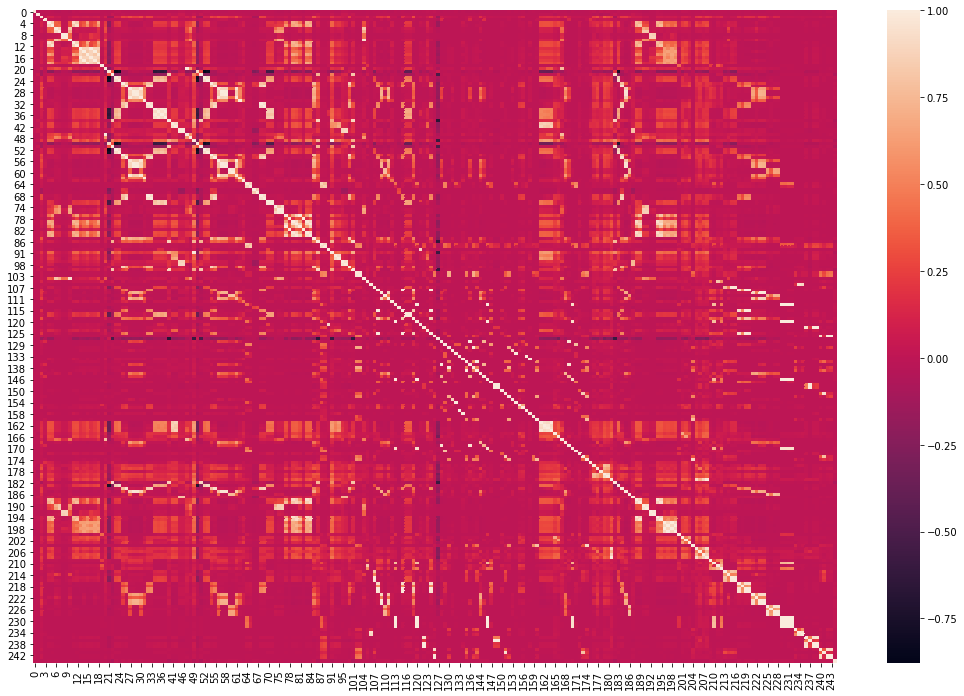

In [28]:
plt.figure(figsize=(18,12))
sns.heatmap(cormat)

In [29]:
def getcorr(data,threshold):
    col=set()
    cormat=data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>threshold:
                colname=cormat.columns[i]
                col.add(colname)
                
    return col

In [30]:
len(getcorr(x_train3,0.85))

124

In [31]:
feat=getcorr(x_train3,0.85)

In [32]:
x_train4=x_train3.drop(labels=feat,axis=1)
x_test4=x_test3.drop(labels=feat,axis=1)

In [33]:
x_train4.shape,x_test4.shape

((16000, 103), (4000, 103))

# Building model using RandomForestClassifier

In [36]:
def model(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    print('accuracy:',accuracy)
    print('clas:',clas)
    print('con:',con)

# Running model on unmodified dataset

In [35]:
%%time
model(x_train,x_test,y_train,y_test)

accuracy: 0.9585
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.29      0.01      0.02       163

    accuracy                           0.96      4000
   macro avg       0.62      0.51      0.50      4000
weighted avg       0.93      0.96      0.94      4000

con: [[3832    5]
 [ 161    2]]
Wall time: 3.15 s


# Running model on transformed dataset

In [37]:
%%time
model(x_train4,x_test4,y_train,y_test)

accuracy: 0.95825
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.25      0.01      0.02       163

    accuracy                           0.96      4000
   macro avg       0.60      0.51      0.50      4000
weighted avg       0.93      0.96      0.94      4000

con: [[3831    6]
 [ 161    2]]
Wall time: 1.94 s


# Building model on decision tree

In [38]:
def model(x_train,x_test,y_train,y_test):
    clf=DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    print('accuracy:',accuracy)
    print('clas:',clas)
    print('con:',con)

In [39]:
%%time
model(x_train4,x_test4,y_train,y_test)

accuracy: 0.92875
clas:               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3837
           1       0.12      0.12      0.12       163

    accuracy                           0.93      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.93      0.93      0.93      4000

con: [[3695  142]
 [ 143   20]]
Wall time: 244 ms


In [40]:
%%time
model(x_train,x_test,y_train,y_test)

accuracy: 0.92225
clas:               precision    recall  f1-score   support

           0       0.96      0.95      0.96      3837
           1       0.13      0.17      0.15       163

    accuracy                           0.92      4000
   macro avg       0.55      0.56      0.55      4000
weighted avg       0.93      0.92      0.93      4000

con: [[3662  175]
 [ 136   27]]
Wall time: 509 ms


# Building model on SVC

In [45]:
sc=StandardScaler().fit(x_train4)

In [46]:
x_train5=sc.transform(x_train4)
x_test5=sc.transform(x_test4)

In [47]:
scc=StandardScaler().fit(x_train)

In [48]:
x_traint=scc.transform(x_train)
x_testt=scc.transform(x_test)

In [49]:
def model(x_train,x_test,y_train,y_test):
    clf=SVC()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    print('accuracy:',accuracy)
    print('clas:',clas)
    print('con:',con)

In [50]:
%%time
model(x_traint,x_testt,y_train,y_test)

accuracy: 0.95925
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.00      0.00      0.00       163

    accuracy                           0.96      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.92      0.96      0.94      4000

con: [[3837    0]
 [ 163    0]]
Wall time: 24.2 s


C:\Users\ghild\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
%%time
model(x_train5,x_test5,y_train,y_test)

accuracy: 0.95925
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.00      0.00      0.00       163

    accuracy                           0.96      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.92      0.96      0.94      4000

con: [[3837    0]
 [ 163    0]]
Wall time: 7.45 s


C:\Users\ghild\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 # Building model from KNeighborsClassifier

In [ ]:
neigh=list(range(1,100,2))
scores=[]
for k in neigh:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train5,y_train,scoring='accuracy')
    scores.append(score.mean())

In [ ]:
scores.mean()

In [ ]:
mse=1-[x for x in scores]
mse

In [ ]:
mse.index(min(mse))

In [53]:
def model(x_train,x_test,y_train,y_test):
    clf=KNeighborsClassifier()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    print('accuracy:',accuracy)
    print('clas:',clas)
    print('con:',con)

In [54]:
%%time
model(x_train5,x_test5,y_train,y_test)

accuracy: 0.95725
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.28      0.03      0.06       163

    accuracy                           0.96      4000
   macro avg       0.62      0.51      0.52      4000
weighted avg       0.93      0.96      0.94      4000

con: [[3824   13]
 [ 158    5]]
Wall time: 10.3 s


In [55]:
%%time
model(x_traint,x_testt,y_train,y_test)

accuracy: 0.957
clas:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3837
           1       0.24      0.02      0.04       163

    accuracy                           0.96      4000
   macro avg       0.60      0.51      0.51      4000
weighted avg       0.93      0.96      0.94      4000

con: [[3824   13]
 [ 159    4]]
Wall time: 38.8 s
